In [1]:
cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src


In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath("./post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("./helper_functions/cloud"))
sys.path.insert(0, os.path.abspath("./file_manager"))
sys.path.insert(0, os.path.abspath("./hamiltonian_builder"))
sys.path.insert(0, os.path.abspath("./correlation"))
sys.path.insert(0, os.path.abspath("./single_and_double_excitations_subspace"))

In [3]:
from file_manager.visualization_preparation_tools import *
from file_manager.file_saver import *
from helper_functions.operators import *
from helper_functions.cloud import *
from helper_functions.other import * 

import matplotlib.pyplot as plt


In [4]:
def relative_error(A,B):
    try:
        return np.average(np.abs((A-B)/(A+B)), axis = 0)
    except:
        return (np.abs((A-B)/(A+B)))


In [5]:
def get_array_of_runs(N, Omega, Delta, b0):
    description = "full_sh_implementation_avg" #testing_steady_state_foda_avg

    results_path = "../results/"
    DefaultInfo = f"N{N}_Omega{Omega}_Delta{Delta}_"
    defaultangle, angle = "25_", "205"
    rho_ss_parameter = "_direct"

    full_description = f"b0_{b0}_V_Int_On_{description}{rho_ss_parameter}"


    label_folder = results_path+DefaultInfo+full_description + "/" # "_"+ defaultangle +angle+ "_"   + rho_ss_parameter + "/"
    paths_array = get_array_of_runs_dat_files(label_folder) #all runs for a given phi
    runs_txt = get_array_of_numpy_runs(paths_array, npy = True)
    
    #paths_array = get_array_of_runs_dat_files(label_folder, get_r = True) #all runs for a given 
    #print(paths_array)
    #runs_txt = get_array_of_numpy_runs(paths_array, npy = True)
    
    return runs_txt

In [6]:
def get_experiments_data(N, Omega, Delta, b0, description, start_index, end_index):
    #G2_MonteCarlo, G2_MonteCarlo_single_excitation = experiments[exp_num][i][0],  experiments[exp_num][i][1]
    #G2_MonteCarlo_same_direction, G2_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][2], experiments[exp_num][i][3]
    #I_MonteCarlo, I_MonteCarlo_single_excitation = experiments[exp_num][i][4], experiments[exp_num][i][5]
    #I_MonteCarlo_same_direction, I_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][6], experiments[exp_num][i][7] 
    #taulist = experiments[exp_num][i][8]

    results_path = "../results/"
    DefaultInfo = f"N{N}_Omega{Omega}_Delta{Delta}_b0_{b0}_"
    defaultangle, angle = "25_", "205"
    rho_ss_parameter = "_direct"

    full_description = f"V_Int_On_{description}{rho_ss_parameter}"
    thetas = np.float32(np.int32(np.linspace(0,360, 90)))

    experiments = np.zeros([end_index-start_index, len(thetas)], dtype = "object")
    indices = []
    for run_index in range(start_index,end_index):
        label_folder = results_path+DefaultInfo+full_description + "/"
        paths_array_containing_theta_files = get_array_of_runs_dat_files(label_folder)#all runs for a given phi
        paths_array = [run_name for run_name in paths_array_containing_theta_files if "theta"  in run_name and f"run{run_index}" in run_name ]
        print(sorted(paths_array)[0])
        runs_txt = get_array_of_numpy_runs(paths_array, npy=True) #all runs for a given phi
        for angle in range(len(thetas)):
            try:
                experiments[run_index-start_index][angle] = runs_txt[angle]
            except:
                print("Problem for: " + str(sorted(paths_array)[0]))
    return experiments

In [7]:
#G2_MonteCarlo, G2_MonteCarlo_single_excitation = experiments[exp_num][i][0],  experiments[exp_num][i][1]
    #G2_MonteCarlo_same_direction, G2_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][2], experiments[exp_num][i][3]
    #I_MonteCarlo, I_MonteCarlo_single_excitation = experiments[exp_num][i][4], experiments[exp_num][i][5]
    #I_MonteCarlo_same_direction, I_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][6], experiments[exp_num][i][7] 
    #taulist = experiments[exp_num][i][8]
    
    
def get_G2_MonteCarlo_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i][0]
def get_G2_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i][1]
def get_G2_MonteCarlo_same_direction_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i][2]
def get_G2_MonteCarlo_single_excitation_same_direction_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i][3]

    
def get_I_MonteCarlo_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i][0+4]
def get_I_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i][1+4]
def get_I_MonteCarlo_same_direction_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i][2+4]
def get_I_MonteCarlo_single_excitation_same_direction_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i][3+4]
    
def get_taulist_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i][8]

def get_g2_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return get_G2_MonteCarlo_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True)/get_I_MonteCarlo_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True)


In [8]:
def get_averaged_in_theta_g2(experiments, single_excitation = False):
    thetas = np.float32(np.int32(np.linspace(0,360, 90)))
    
        
    g2_theta_avg_all_configurations = []
    for run_index in range(len(experiments)):
        G2_theta_avg = np.average([get_G2_MonteCarlo_from_experiment_and_angle(experiments, run_index, angle) for angle in range(len(thetas))], axis = 0)
        I_theta_avg = np.average(np.array([get_I_MonteCarlo_from_experiment_and_angle(experiments, run_index, angle) for angle in range(len(thetas))]))

        g2_theta_avg  = G2_theta_avg/I_theta_avg
        g2_theta_avg_all_configurations.append(g2_theta_avg)

        if single_excitation == True:  
            G2_theta_avg = np.average([get_G2_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, run_index, angle) for angle in range(len(thetas))], axis = 0)
            I_theta_avg = np.average(np.array([get_I_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, run_index, angle) for angle in range(len(thetas))]))

            g2_theta_avg  = G2_theta_avg/I_theta_avg
            g2_theta_avg_all_configurations.append(g2_theta_avg)

    
    taulist = get_taulist_from_experiment_and_angle(experiments, 0, 0)
    return taulist, g2_theta_avg_all_configurations



Uploading simulated results

In [9]:
Omega = 0.5
Delta = 20.0
b0 = 15
N = 100
description = "full_sh_implementation_avg" #testing_steady_state_foda_avg
#experiments[realização i][angulo j]
experiments = get_experiments_data(N = N, Omega = Omega, Delta = Delta, b0 = b0, description = description, start_index=3, end_index=11)


#N = 6
#description = "MC_npy_avg"
#experiments = get_experiments_data(N = N, Omega = Omega, Delta = 20.0, b0 = 11.0, description = description, start_index=1, end_index=11)


../results/N100_Omega0.5_Delta20.0_b0_15_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run3.npy
../results/N100_Omega0.5_Delta20.0_b0_15_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run4.npy
../results/N100_Omega0.5_Delta20.0_b0_15_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run5.npy
../results/N100_Omega0.5_Delta20.0_b0_15_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run6.npy
../results/N100_Omega0.5_Delta20.0_b0_15_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run7.npy
../results/N100_Omega0.5_Delta20.0_b0_15_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run8.npy
../results/N100_Omega0.5_Delta20.0_b0_15_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run9.npy
../results/N100_Omega0.5_Delta20.0_b0_15_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_r

Showing  average $g^{(2)}(\tau)$ for $\theta = 0$ and for $ 0 < \theta < 360$ ($\theta$ averaging) for each configuration.

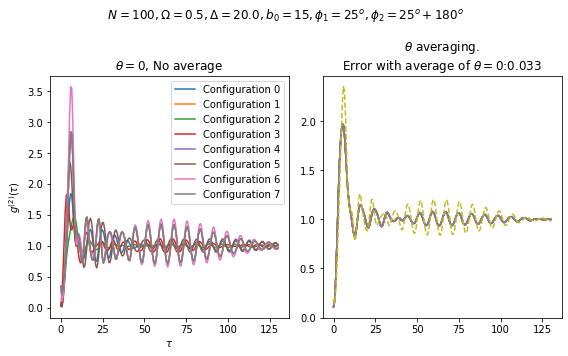

In [10]:
fig = plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0} , \phi_1 = 25^o, \phi_2 = 25^o+180^o $ ", size = "large")

taulist, g2_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments, single_excitation = False)

for run_num in range(0, len(experiments)):
    configuration = run_num
    g2_double_excitation_for_given_angle_and_configuration = np.abs(get_g2_from_experiment_and_angle(experiments, run_num, 0, double_excitation_dynamics = True)) 
    plt.plot(taulist*26, g2_double_excitation_for_given_angle_and_configuration, label = f"Configuration {run_num}")
    

plt.legend()
plt.title(r"$\theta = 0$, No average")
plt.ylabel(r"$g^{(2)}(\tau)$")
plt.xlabel(r"$\tau$")

plt.subplot(1,2,2)

  
for run_num in range(0, len(experiments)):
    configuration = run_num
    g2_theta_avg_for_given_configuration = g2_theta_avg_all_configurations[configuration]
    plt.plot(taulist*26, np.abs(g2_theta_avg_for_given_configuration), label = f"Configuration {run_num}")

in_plane_average = np.average([np.abs(get_g2_from_experiment_and_angle(experiments, run_num, 0, double_excitation_dynamics = True)) 
                                 for run_num in range(len(experiments))],axis = 0)

plt.plot(taulist*26, in_plane_average, "--")
 


relative_error_between_avg_of_theta_zero_and_theta_avg = relative_error(in_plane_average, g2_theta_avg_for_given_configuration) 

title = r"$\theta$ averaging." +  "\n" + r"Error with average of $\theta=0$:" + str(np.round(relative_error_between_avg_of_theta_zero_and_theta_avg, 3)) 
plt.title(title)

plt.tight_layout()

plt.savefig(f"showing_theta_averages_works_N{N}.png", dpi = 400)

Comparing in-plane against theta averaging

../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run3.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run4.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run5.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run6.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run7.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run8.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run9.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_r

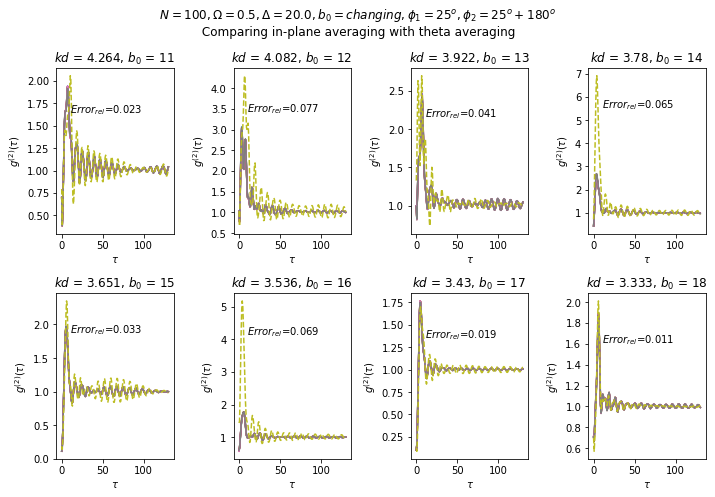

In [12]:
fig = plt.figure(figsize = (10,7))

plt.subplot(1,2,1)
plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = changing , \phi_1 = 25^o, \phi_2 = 25^o+180^o $ \n Comparing in-plane averaging with theta averaging", size = "large")

taulist, g2_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments, single_excitation = False)

b0_s = range(11,19,1)
kd_s = [get_radius_from_optical_thickness(N,b0) for b0 in b0_s]

for i in range(len(kd_s)):
    kd = kd_s[i]
    b0 = b0_s[i]
    
    
    plt.subplot(2,4,i+1)

    plt.title(f"$kd$ = {np.round(kd,3)}, $b_0$ = {b0} ")
    plt.ylabel(r"$g^{(2)}(\tau)$")
    plt.xlabel(r"$\tau$")

    experiments = get_experiments_data(N, Omega, Delta = Delta, b0 = b0, description = description, start_index=3, end_index=11)
    taulist, g2_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments, single_excitation = False)
    

  
    for run_num in range(0, len(experiments)):
        configuration = run_num
        g2_theta_avg_for_given_configuration = g2_theta_avg_all_configurations[configuration]
        plt.plot(taulist*26, np.abs(g2_theta_avg_for_given_configuration))

    in_plane_average = np.abs(np.average([np.abs(get_g2_from_experiment_and_angle(experiments, run_num, 0, double_excitation_dynamics = True)) 
                                 for run_num in range(len(experiments))],axis = 0))

    plt.plot(taulist*26, in_plane_average, "--")

    relative_error_between_avg_of_theta_zero_and_theta_avg = relative_error(in_plane_average, g2_theta_avg_for_given_configuration) 

    s = r"$Error_{rel}$="+ f"{np.round(relative_error_between_avg_of_theta_zero_and_theta_avg, 3)}"
    plt.text(10, np.max(np.abs(in_plane_average))*0.80,s  )
    
plt.tight_layout()

#plt.savefig(f"showing_theta_averages_works_N{N}.png", dpi = 400)

Showing the small error in the $\theta$ averaging case in each configuration with respect to the mean (of all configurations)

Text(0.5, 0, 'Relative error of each $\\theta$ averaged configuration with respect to mean')

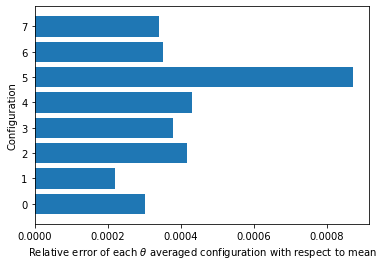

In [13]:
g2_theta_avg_all_configurations_average =  np.average(g2_theta_avg_all_configurations,axis=0)
relative_error_of_theta_averaged_configurations = [relative_error(g2_theta_avg_all_configurations_average, g2_theta_avg_all_configurations[i]) for i in range(len(experiments))]

plt.barh(range(len(experiments)),relative_error_of_theta_averaged_configurations)
plt.ylabel(r"Configuration")
plt.xlabel(r"Relative error of each $\theta$ averaged configuration with respect to mean")

Let's see the error between each $\theta$ run and its $\theta$ averaged mean

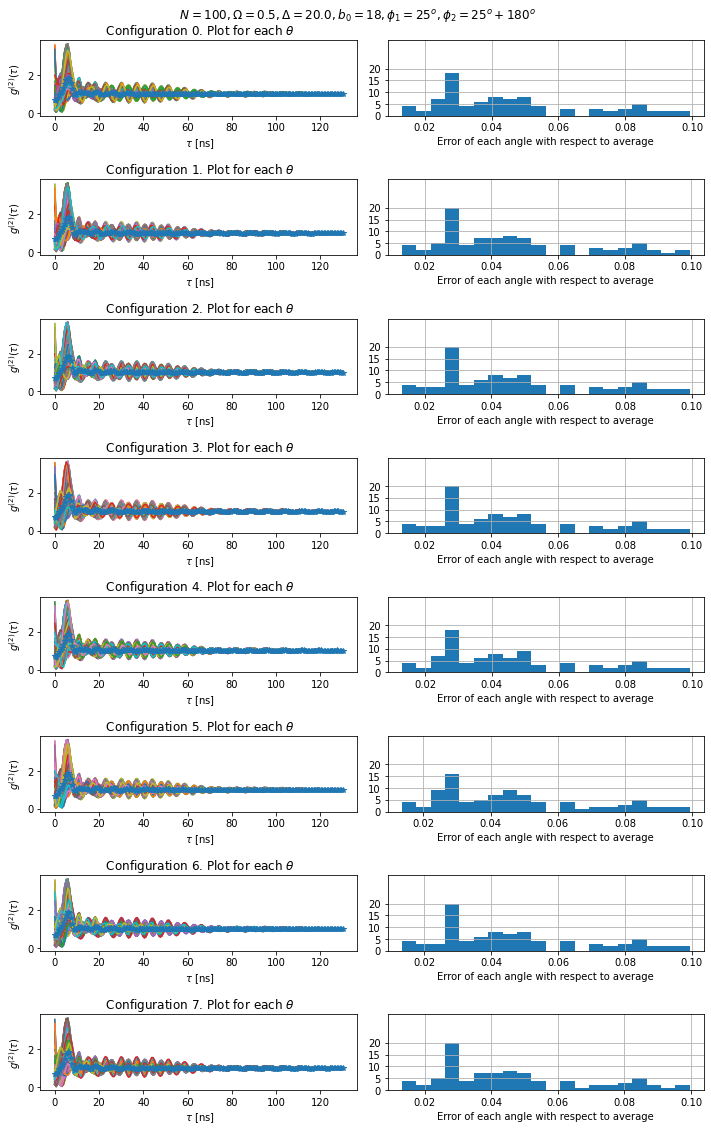

In [14]:
taulist, g2_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments, single_excitation = False)
taulist, g2_theta_avg_all_configurations_single_excitation = get_averaged_in_theta_g2(experiments, single_excitation = True)


fig = plt.figure(figsize = (10,16))


configuration = 5
num_of_angles = 90
thetas = np.float32(np.int32(np.linspace(0,360, num_of_angles)))
error_of_each_angle_with_average = np.zeros_like(thetas)



for run_num in range(0, len(experiments)):

    configuration = run_num
    plt.subplot(len(experiments), 2, 2*configuration+1 )

    g2_theta_avg_for_given_configuration = g2_theta_avg_all_configurations[configuration]

    for angle in range(len(thetas)):
        g2_double_excitation_for_given_angle_and_configuration = np.abs(get_g2_from_experiment_and_angle(experiments, configuration, angle, double_excitation_dynamics = True)) 
        plt.plot(taulist*26, g2_double_excitation_for_given_angle_and_configuration)
        error_of_each_angle_with_average[angle] = relative_error(g2_theta_avg_for_given_configuration,
                                                                 g2_double_excitation_for_given_angle_and_configuration)

    plt.plot(taulist*26, np.abs(g2_theta_avg_for_given_configuration), "*")


    #plt.plot(taulist, np.abs(get_g2_from_experiment_and_angle(experiments, configuration, 0) ))

    #plt.legend()
    plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0} , \phi_1 = 25^o, \phi_2 = 25^o+180^o $ ", size = "large")

    plt.title(f" Configuration {configuration}. Plot for each"  + r" $\theta$")        
    plt.ylabel(r"$g^{(2)}(\tau)$")
    plt.xlabel(r" $\tau$ [ns]")

    plt.subplot(len(experiments), 2, 2*configuration+2)

    plt.ylim(0,32)
    plt.yticks([0,5,10,15,20])
    plt.grid()
    plt.hist(error_of_each_angle_with_average, 20)
    plt.xlabel(r"Error of each angle with respect to average")


plt.tight_layout()




In [15]:
from scipy.signal import  argrelextrema
import scipy.optimize

In [16]:
def monoExp(x, m, t):
    return m * np.exp(-t * x) + 1

In [17]:
def get_decay_rate_using_extrema(x,y):
    extrema = argrelextrema(y, np.greater, order = 2)
    p0 = (1, 1) # start with values near those we expect
    params, cv = scipy.optimize.curve_fit(monoExp, x[extrema], y[extrema], p0)
    m, lam = params
    
    return params


/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/roberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Text(0.5, 0, ' $\\tau$ [ns]')

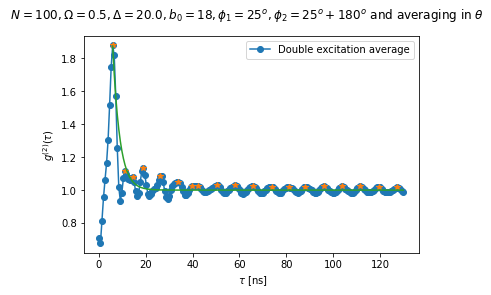

In [18]:
taulist_ns = taulist*26

plt.plot(taulist_ns, np.average(g2_theta_avg_all_configurations, axis = 0), "-o" , label = "Double excitation average")


extrema = argrelextrema(np.average(g2_theta_avg_all_configurations, axis = 0), np.greater, order = 2)
taulist_extrema = taulist_ns[extrema]
g2_theta_extrema = np.average(g2_theta_avg_all_configurations, axis = 0)[extrema]
plt.plot(taulist_extrema, g2_theta_extrema, "*" )


p0 = (1, 1) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, taulist_extrema, g2_theta_extrema, p0)
m, lam = params
plt.plot(taulist_ns[extrema[0][0]:], monoExp(taulist_ns[extrema[0][0]:], *params))


#plt.ylim(0.5,2)
plt.legend()

plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0} , \phi_1 = 25^o, \phi_2 = 25^o+180^o $ and averaging in"  + r" $\theta$", size = "large")
plt.ylabel(r"$g^{(2)}(\tau)$")
plt.xlabel(r" $\tau$ [ns]")


In [32]:
from scipy.interpolate import interp1d

def enveloppe(s):
    u_x = [] # do not add 0
    u_y = []
    q_u = np.zeros(s.shape)
    for k in range(1,len(s)-1):
        if (np.sign(s[k]-s[k-1])==1) and (np.sign(s[k]-s[k+1])==1):
            u_x.append(k)
            u_y.append(s[k])
    print(u_x)
    u_p = interp1d(u_x,u_y, kind = 'cubic',
              bounds_error = False, 
              fill_value="extrapolate") # use fill_value="extrapolate"
    for k in range(0,len(s)):
        q_u[k] = u_p(k)
    return q_u   

[9, 17, 22, 29, 40, 52, 61, 65, 77, 89, 101, 113, 124, 135, 147, 159, 171, 183, 195]


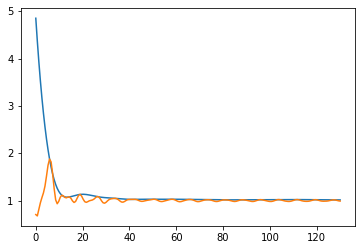

In [39]:
g2_temp = np.abs(np.average(g2_theta_avg_all_configurations, axis = 0))
plt.plot(taulist_ns, enveloppe(g2_temp))
plt.plot(taulist_ns, g2_temp)

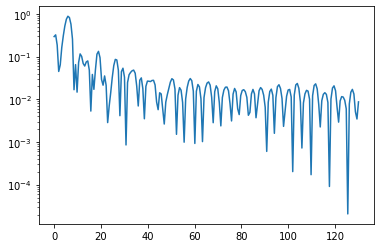

In [29]:
g2_log = np.abs(np.average(g2_theta_avg_all_configurations, axis = 0)-1)
plt.yscale("log")
plt.plot(taulist_ns, g2_log)

In [ ]:
taulist_ns = taulist*26

g2_log = np.abs(np.average(g2_theta_avg_all_configurations, axis = 0)-1)
plt.plot(taulist_ns, np.average(g2_theta_avg_all_configurations, axis = 0), "-o" , label = "Double excitation average")


extrema = argrelextrema(np.average(g2_theta_avg_all_configurations, axis = 0), np.greater, order = 2)
taulist_extrema = taulist_ns[extrema]
g2_theta_extrema = np.average(g2_theta_avg_all_configurations, axis = 0)[extrema]
plt.plot(taulist_extrema, g2_theta_extrema, "*" )


p0 = (1, 1) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, taulist_extrema, g2_theta_extrema, p0)
m, lam = params
plt.plot(taulist_ns[extrema[0][0]:], monoExp(taulist_ns[extrema[0][0]:], *params))


#plt.ylim(0.5,2)
plt.legend()

plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0} , \phi_1 = 25^o, \phi_2 = 25^o+180^o $ and averaging in"  + r" $\theta$", size = "large")
plt.ylabel(r"$g^{(2)}(\tau)$")
plt.xlabel(r" $\tau$ [ns]")


In [19]:
b0_s = range(11,19,1)
N = 100
description = "full_sh_implementation_avg" #testing_steady_state_foda_avg
#description = "MC_npy_avg"
#experiments[realização i][angulo j]
r_s = [get_radius_from_optical_thickness(N, b0) for b0 in b0_s]
g2_single_excitation = np.zeros([len(b0_s)+1, len(taulist)], dtype = "complex")
g2_double_excitation = np.zeros([len(b0_s)+1, len(taulist)], dtype = "complex")


decay_rates_double_excitation = np.zeros([len(b0_s)+1])
decay_rates_single_excitation = np.zeros([len(b0_s)+1])


cs_single_excitation = np.zeros([len(b0_s)+1, len(taulist)], dtype = "complex")
cs_double_excitation = np.zeros([len(b0_s)+1, len(taulist)], dtype = "complex")

Omega = 0.5
Delta = 20.0 


i = 0
for b0 in b0_s:

    experiments = get_experiments_data(N, Omega, Delta = 20.0, b0 = b0, description = description, start_index=3, end_index=11)
    taulist, g2_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments, single_excitation = False)
    taulist, g2_theta_avg_all_configurations_single_excitation = get_averaged_in_theta_g2(experiments, single_excitation = True)
    
    g2_single_excitation[i] = np.average(g2_theta_avg_all_configurations_single_excitation,axis = 0) 
    g2_double_excitation[i] = np.average(g2_theta_avg_all_configurations,axis = 0) 
    
    
    m, lam = get_decay_rate_using_extrema(taulist,g2_single_excitation[i])
    decay_rates_single_excitation[i] = lam
    
    
    m, lam = get_decay_rate_using_extrema(taulist,g2_double_excitation[i])
    decay_rates_double_excitation[i] = lam
    
    
    
    i += 1
    
    
    

../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run3.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run4.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run5.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run6.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run7.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run8.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run9.npy
../results/N100_Omega0.5_Delta20.0_b0_11_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_r

/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


../results/N100_Omega0.5_Delta20.0_b0_12_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run4.npy
../results/N100_Omega0.5_Delta20.0_b0_12_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run5.npy
../results/N100_Omega0.5_Delta20.0_b0_12_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run6.npy
../results/N100_Omega0.5_Delta20.0_b0_12_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run7.npy
../results/N100_Omega0.5_Delta20.0_b0_12_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run8.npy
../results/N100_Omega0.5_Delta20.0_b0_12_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run9.npy
../results/N100_Omega0.5_Delta20.0_b0_12_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_run10.npy
../results/N100_Omega0.5_Delta20.0_b0_13_V_Int_On_full_sh_implementation_avg_direct/N100_Omega0.5_Delta20.0_theta0.0_

In [20]:
decay_rates_double_excitation

array([1.74114933, 2.59334364, 3.53185394, 4.40689654, 3.84024082,
       5.5419541 , 4.21819213, 8.61716404, 0.        ])

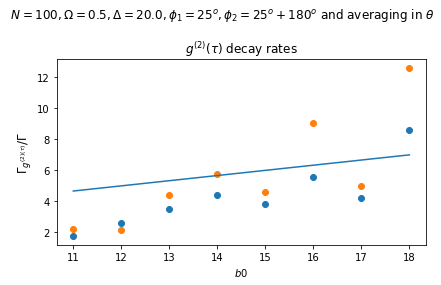

In [47]:
kd_s = [get_radius_from_optical_thickness(N,b0) for b0 in b0_s]

plt.scatter(b0_s,decay_rates_double_excitation[:-1])
plt.scatter(b0_s,decay_rates_single_excitation[:-1])

#plt.plot(kd_s,decay_rates_double_excitation[:-1])
#plt.plot(kd_s,decay_rates_single_excitation[:-1])

plt.plot(b0_s, [1+b0/3 for b0 in b0_s])
plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, \phi_1 = 25^o, \phi_2 = 25^o+180^o $ and averaging in"  + r" $\theta$", size = "large")
plt.title(R"$g^{(2)}(\tau)$ decay rates")

plt.ylabel(r"$\Gamma_{g^{(2)(\tau)}}/\Gamma$", size = "large")
plt.xlabel("$b0$")
plt.tight_layout()

Comparing single and double excitation 

In [22]:
taulist, g2_theta_avg_all_configurations_single_excitation = get_averaged_in_theta_g2(experiments, single_excitation = True)
taulist, g2_theta_avg_all_configurations_double_excitation = get_averaged_in_theta_g2(experiments, single_excitation = False)

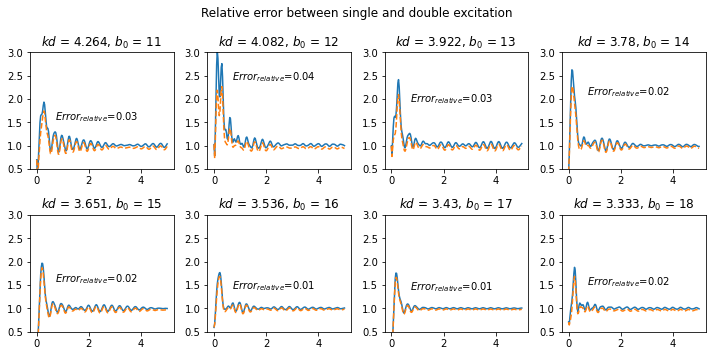

In [26]:
fig = plt.figure(figsize = (10,5))

plt.suptitle("Relative error between single and double excitation")
for i in range(len(kd_s)):
    kd = kd_s[i]
    b0 = b0_s[i]
    plt.subplot(2,4,i+1)
    plt.title(f"$kd$ = {np.round(kd,3)}, $b_0$ = {b0} ")
    plt.plot(taulist, np.abs(g2_double_excitation[i]), "-")
    plt.plot(taulist, np.abs(g2_single_excitation[i]), "--")
    avg_relative_error = relative_error(np.abs(g2_double_excitation[i]),np.abs(g2_single_excitation[i]))
    s = r"$Error_{relative}$="+ f"{np.round(avg_relative_error, 2)}"
    plt.text(0.7, np.max(np.abs(g2_double_excitation[i]))*0.80,s  )

    plt.ylim(0.5,3)
plt.tight_layout()
    

Comparing in-plane against theta averaging

- Conclusion:

1. $\Omega = 0.5$ e N<100 single = double
2. Theta averaging = Configuration averaging, ou seja só preciso fazer uma configuração e 90 angulos

N=100
b0=15
steady state
1) preparado com o modelo de 2 excitações (com interações)
Romain Pierre Marcel Bachelard10:53
2) msm coisa, mas desligando a interação
passo seguinte: simular a dinâmica do g2 fake à partir desses 2 steady-state, COM interações em ambos os casos
Romain Pierre Marcel Bachelard10:55
G_ij = 0

In [66]:
np.arange(4,361,4)[:-2]

array([  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,
        56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104,
       108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156,
       160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208,
       212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260,
       264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308, 312,
       316, 320, 324, 328, 332, 336, 340, 344, 348, 352])

In [63]:
a = [4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,
        56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104,
       108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156,
       160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208,
       212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260,
       264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308, 312,
       316, 320, 324, 328, 332, 336, 340, 344, 348, 352]

In [64]:
len(a)

88

In [65]:
360/90

4.0

In [62]:
len(np.arange(4,361,4))

90

In [55]:
324+36

360